<a href="https://colab.research.google.com/github/VladlenaTA/Labs_ML/blob/main/imdb(Vector_embedding)_3_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Набор данных IMDb movie review

[Набор данных IMDb movie review](https://ai.stanford.edu/~amaas/data/sentiment/) создан для задач определения тональности текста. Набор включает отзывы на фильмы с сайта [IMDb](https://www.imdb.com). Отзывы только явно положительные (оценка >= 7) или отрицательные (оценка <= 4), нейтральные отзывы в набор данных не включались.

Размер набора данных 50 тыс. отзывов:
- Набор данных для обучения - 25 тыс. отзывов
- Набор данных для тестирования - 25 тыс. отзывов

Количество положительных и отрицательных отзывов одинаковое.

Разметка набора данных:
- 0 - отзыв отрицательный
- 1 - отзыв положительный

<img src="https://www.dropbox.com/s/grd17bkapocb92o/imdb_movie_reviews.png?dl=1" width="600">


In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
%matplotlib inline 

## Загружаем данные

In [ ]:
max_words=10000

In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

17464789/17464789 [==============================] - 0s 0us/step


## Просмотр данных

Рецензия:
отзывы разделены на слова и каждое слово представленно числом - которое указывает на частоту с которой это слово встречается в IMDB

In [ ]:
x_train[3]

[1,
 4,
 2,
 2,
 33,
 2804,
 4,
 2040,
 432,
 111,
 153,
 103,
 4,
 1494,
 13,
 70,
 131,
 67,
 11,
 61,
 2,
 744,
 35,
 3715,
 761,
 61,
 5766,
 452,
 9214,
 4,
 985,
 7,
 2,
 59,
 166,
 4,
 105,
 216,
 1239,
 41,
 1797,
 9,
 15,
 7,
 35,
 744,
 2413,
 31,
 8,
 4,
 687,
 23,
 4,
 2,
 7339,
 6,
 3693,
 42,
 38,
 39,
 121,
 59,
 456,
 10,
 10,
 7,
 265,
 12,
 575,
 111,
 153,
 159,
 59,
 16,
 1447,
 21,
 25,
 586,
 482,
 39,
 4,
 96,
 59,
 716,
 12,
 4,
 172,
 65,
 9,
 579,
 11,
 6004,
 4,
 1615,
 5,
 2,
 7,
 5168,
 17,
 13,
 7064,
 12,
 19,
 6,
 464,
 31,
 314,
 11,
 2,
 6,
 719,
 605,
 11,
 8,
 202,
 27,
 310,
 4,
 3772,
 3501,
 8,
 2722,
 58,
 10,
 10,
 537,
 2116,
 180,
 40,
 14,
 413,
 173,
 7,
 263,
 112,
 37,
 152,
 377,
 4,
 537,
 263,
 846,
 579,
 178,
 54,
 75,
 71,
 476,
 36,
 413,
 263,
 2504,
 182,
 5,
 17,
 75,
 2306,
 922,
 36,
 279,
 131,
 2895,
 17,
 2867,
 42,
 17,
 35,
 921,
 2,
 192,
 5,
 1219,
 3890,
 19,
 2,
 217,
 4122,
 1710,
 537,
 2,
 1236,
 5,
 736,
 10,
 10,


Правильный ответ

In [ ]:
y_train[3]

1

## Подготовка данных для обучения

In [ ]:
maxlen = 200

In [ ]:
x_train = pad_sequences(x_train, maxlen=maxlen, padding='post')
x_test = pad_sequences(x_test, maxlen=maxlen, padding='post')

In [ ]:
x_train[1]

array([   1,  194, 1153,  194, 8255,   78,  228,    5,    6, 1463, 4369,
       5012,  134,   26,    4,  715,    8,  118, 1634,   14,  394,   20,
         13,  119,  954,  189,  102,    5,  207,  110, 3103,   21,   14,
         69,  188,    8,   30,   23,    7,    4,  249,  126,   93,    4,
        114,    9, 2300, 1523,    5,  647,    4,  116,    9,   35, 8163,
          4,  229,    9,  340, 1322,    4,  118,    9,    4,  130, 4901,
         19,    4, 1002,    5,   89,   29,  952,   46,   37,    4,  455,
          9,   45,   43,   38, 1543, 1905,  398,    4, 1649,   26, 6853,
          5,  163,   11, 3215,    2,    4, 1153,    9,  194,  775,    7,
       8255,    2,  349, 2637,  148,  605,    2, 8003,   15,  123,  125,
         68,    2, 6853,   15,  349,  165, 4362,   98,    5,    4,  228,
          9,   43,    2, 1157,   15,  299,  120,    5,  120,  174,   11,
        220,  175,  136,   50,    9, 4373,  228, 8255,    5,    2,  656,
        245, 2350,    5,    4, 9837,  131,  152,  4

In [ ]:
y_train[1]

0

## Создание нейронной сети

In [ ]:
model = Sequential()
model.add(Embedding(max_words, 2, input_length=maxlen))
model.add(Dropout(0.25)) #вставляем Droput чтобы снизить переобучение
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

## Обучаем нейронную сеть

In [ ]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=15,
                    batch_size=128,
                    validation_split=0.1)

Epoch 1/15
176/176 [==============================] - 36s 161ms/step - loss: 0.6933 - accuracy: 0.5021 - val_loss: 0.6923 - val_accuracy: 0.5168
Epoch 2/15
176/176 [==============================] - 14s 77ms/step - loss: 0.6752 - accuracy: 0.6381 - val_loss: 0.6423 - val_accuracy: 0.7096
Epoch 3/15
176/176 [==============================] - 11s 60ms/step - loss: 0.5486 - accuracy: 0.7755 - val_loss: 0.4737 - val_accuracy: 0.8156
Epoch 4/15
176/176 [==============================] - 5s 30ms/step - loss: 0.4043 - accuracy: 0.8440 - val_loss: 0.3832 - val_accuracy: 0.8504
Epoch 5/15
176/176 [==============================] - 6s 32ms/step - loss: 0.3313 - accuracy: 0.8736 - val_loss: 0.3416 - val_accuracy: 0.8632
Epoch 6/15
176/176 [==============================] - 4s 25ms/step - loss: 0.2889 - accuracy: 0.8909 - val_loss: 0.3192 - val_accuracy: 0.8684
Epoch 7/15
176/176 [==============================] - 4s 21ms/step - loss: 0.2608 - accuracy: 0.9034 - val_loss: 0.3059 - val_accuracy: 0.

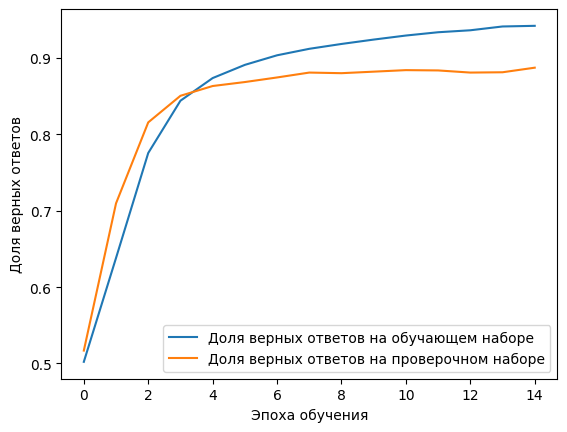

In [ ]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Проверяем работу сети на тестовом наборе данных

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=1)

782/782 [==============================] - 2s 2ms/step - loss: 0.3051 - accuracy: 0.8711


## Исследуем обученное плотное векторное представление слов

**Получаем матрицу плотных векторных представлений слов**

In [ ]:
embedding_matrix = model.layers[0].get_weights()[0]

In [ ]:
embedding_matrix[:5]

array([[-0.01498747,  0.01803773],
       [-0.03492948, -0.05907665],
       [-0.01974351, -0.02654063],
       [ 0.02045615,  0.00520702],
       [ 0.01888893,  0.02938682]], dtype=float32)

**Загружаем словарь с номерами слов**

In [ ]:
word_index_org = imdb.get_word_index()

1641221/1641221 [==============================] - 0s 0us/step


Дополняем словарь служебными символами

In [ ]:
word_index = dict()
for word,number in word_index_org.items():
    word_index[word] = number + 3
word_index["<Заполнитель>"] = 0
word_index["<Начало последовательности>"] = 1
word_index["<Неизвестное слово>"] = 2  
word_index["<Не используется>"] = 3

**Ищем векторы для слов**

In [ ]:
word = 'good'#'bad'
word_number = word_index[word]
print('Номер слова', word_number)
print('Вектор для слова', embedding_matrix[word_number])

Номер слова 6
Вектор для слова [ 0.02306555 -0.00763398]


## Сохраняем обученные плотные векторные представления в файл

**Составляем реверсивный словарь токенов (слов)**

In [ ]:
reverse_word_index = dict()
for key, value in word_index.items():
    reverse_word_index[value] = key

**Записываем плотные векторные представления в файл**

In [ ]:
filename = 'imdb_embeddings.csv'

In [ ]:
with open(filename, 'w') as f:
    for word_num in range(max_words):
      word = reverse_word_index[word_num]
      vec = embedding_matrix[word_num]
      f.write(word + ",")
      f.write(','.join([str(x) for x in vec]) + "\n")

In [ ]:
!head -n 20 $filename

<Заполнитель>,-0.014987474,0.018037727
<Начало последовательности>,-0.03492948,-0.05907665
<Неизвестное слово>,-0.019743506,-0.026540633
<Не используется>,0.020456146,0.0052070245
the,0.01888893,0.029386817
and,0.08788817,0.024255486
a,0.023065548,-0.0076339836
of,0.012205742,-0.054151878
to,-0.0091026155,-0.0018069419
is,0.059900068,0.019729
br,-0.008687146,-0.028846445
in,0.033229936,-0.00085082505
it,0.05964416,0.07460888
i,0.02933346,0.0019547234
this,-0.014425702,-0.04623709
that,-0.0028170035,0.00066878024
was,-0.02864432,-0.06052367
as,0.03833195,-0.028949402
for,-0.031431332,-0.0003644451
with,0.016318068,-0.007760126


**Сохраняем файл на локальный компьютер**

In [ ]:
files.download('imdb_embeddings.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Визуализация плотных векторных представлений слов

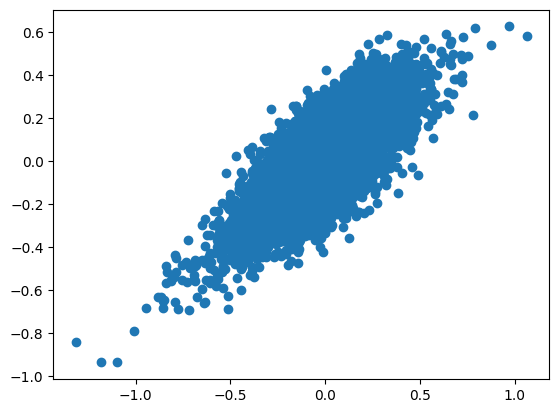

In [ ]:
plt.scatter(embedding_matrix[:,0], embedding_matrix[:,1])

Выбираем коды слов, по которым можно определить тональность отзыва

In [ ]:
review = ['brilliant', 'fantastic', 'amazing', 'good',
          'bad', 'awful','crap', 'terrible', 'trash']
enc_review = []
for word in review:
    enc_review.append(word_index[word])
enc_review

[530, 777, 480, 52, 78, 373, 595, 394, 1157]

Получаем векторное представление интересующих нас слов

In [ ]:
review_vectors = embedding_matrix[enc_review]
review_vectors

array([[ 0.5850693 ,  0.23869759],
       [ 0.62760305,  0.4850009 ],
       [ 0.6607834 ,  0.54516065],
       [ 0.14862436,  0.18533017],
       [-0.5443891 , -0.40331337],
       [-1.0974009 , -0.9361429 ],
       [-0.5664317 , -0.38017672],
       [-0.833513  , -0.5178649 ],
       [-0.34326932,  0.03449481]], dtype=float32)

Визуализация обученного плотного векторного представления слов, по которым можно определить эмоциональную окраску текста

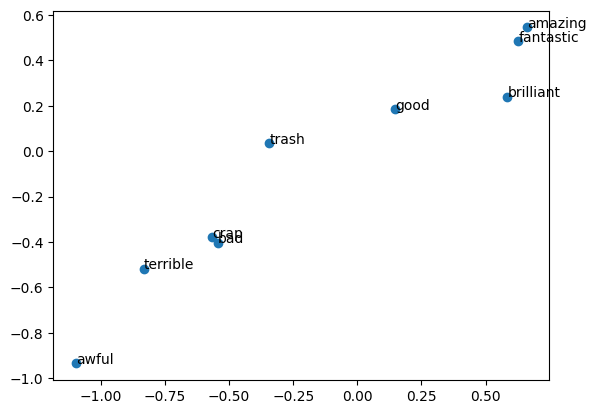

In [ ]:
plt.scatter(review_vectors[:,0], review_vectors[:,1])
for i, txt in enumerate(review):
    plt.annotate(txt, (review_vectors[i,0], review_vectors[i,1]))